<a href="https://colab.research.google.com/github/flookyteeco2005/Bigdata/blob/master/Corporate_energy_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In this exercise, you will work with the Calgary *Corporate Energy Consumption* tabular dataset. If you already haven't do so, please download the file entitled `'Corporate_Energy_Consumption.csv'` from D2L. 

This file has been downloaded from the City of Calgary's [open data portal](https://data.calgary.ca/Environment/Corporate-Energy-Consumption/crbp-innf) and contains information licensed under the Open Government License - City of Calgary.

In [0]:
# Put all your imports here
# main libraries
import pandas as pd
import numpy as np
import time
import csv
import json
import requests 
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
%matplotlib inline



### Task 0: Data Reading

Read in the dataset into a `pandas` `DataFrame` and display the head and tail of the `DataFrame`. Please take a minute to familiarize yourself with the rows and columns in the dataset.
 

In [0]:
## Solution to Task 0
from google.colab import files
uploaded = files.upload()



Saving Corporate_Energy_Consumption.csv to Corporate_Energy_Consumption (1).csv


In [0]:
import io
import os
os.getcwd()

'/content'

In [0]:
os.listdir(os.getcwd())

['.config', 'Corporate_Energy_Consumption.csv', 'sample_data']

In [0]:
##df2 = pd.read_csv(io.BytesIO(uploaded['Corporate_Energy_Consumption.csv']))

df2 = pd.read_csv('Corporate_Energy_Consumption.csv')
df2.head()

,Business Unit Desc,FacilityName,Site ID,FacilityAddress,Energy Description,Year,Month,Total Consumption,Unit
0,Calgary Building Services,EASTLAKE DEPOT,0020006226011,11195 42 ST SE,Electricity,2018,May,28121.0,kWh
1,Calgary Building Services,EASTLAKE DEPOT,0003045011383,11195 42 ST SE,Natural Gas,2018,May,31.0,GJ
2,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,5821 23 AV SE,Electricity,2018,May,1055.0,kWh
3,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003804625,5821 23 AV SE,Electricity,2018,May,745.0,kWh
4,Calgary Neighbourhoods,SENIOR SERVICES DIVISION - CITY LINKS,0020003108512,311 34 AV SE,Electricity,2018,May,3862.0,kWh


In [0]:
df2.tail()

,Business Unit Desc,FacilityName,Site ID,FacilityAddress,Energy Description,Year,Month,Total Consumption,Unit
189200,Water Services,STLS69A HERITAGE MEADOWS,0003007575585,50 HERITAGE MEAD WY SE,Natural Gas,2009,Apr,0.0,GJ
189201,Water Services,STLS74A SOUTH CALGARY,0020006040768,1535 27 AV SW,Electricity,2009,Apr,4375.0,kWh
189202,Water Services,STLS77A DUFFERIN INDUSTRIAL PARK,0020005290415,6900 112 AV SE,Electricity,2009,Apr,4134.0,kWh
189203,Water Services,STLS77A DUFFERIN INDUSTRIAL PARK,0003264011138,6900 112 AV SE,Natural Gas,2009,Apr,17.0,GJ
189204,Water Services,STORM POND - 14 ST SW,0020004440712,17399 14 ST SW,Electricity,2009,Apr,48.0,kWh


In [0]:
# Print the shape of the dataframe 
print(df2.shape) 

(189205, 9)


## Task 1: Cleanup and Organization

For this exercise, we will focus on electrical energy consumption data that is recorded in `'kWh'` units, and the 5 year time period 2013-2017.
<br>
- Cleanup your DataFrame by retaining only the rows where the `'Unit'` column has the entry `'kWh'`. 

- Additionally, drop all years that are outside the `2013--2017` range. 

Perform the following tasks on the _resulting_ DataFrame:

- Determine and print out the unique entries under the following columns: `'Business Unit Desc'`, `'Energy Description'`, `'Year'` and  `'Unit'`. 



Convert the `'Month'` column into a suitable numerical or `datetime` format so that the entries can be ordered by month. 
_(This conversion is not necessary for the subsequent tasks.)_


- Print out the unique entries under the `'Month'` column. 

In [0]:
## Solution to Task 1

# first filtered out those rows which do not contain any data 
df2_filtered = df2.dropna(how = 'all')


In [0]:
## Here I printed the df2_filtered and shape after dropping rows that do not contain data
print(df2_filtered.head(15))
print(df2_filtered.shape) 

           Business Unit Desc  ... Unit
0   Calgary Building Services  ...  kWh
1   Calgary Building Services  ...   GJ
2     Calgary Fire Department  ...  kWh
3     Calgary Fire Department  ...  kWh
4      Calgary Neighbourhoods  ...  kWh
5      Calgary Neighbourhoods  ...   GJ
6      Calgary Neighbourhoods  ...  kWh
7      Calgary Neighbourhoods  ...   GJ
8        Calgary Parking Auth  ...  kWh
9        Calgary Parking Auth  ...  kWh
10       Calgary Parking Auth  ...   GJ
11       Calgary Parking Auth  ...  kWh
12       Calgary Parking Auth  ...  kWh
13       Calgary Parking Auth  ...   GJ
14       Calgary Parking Auth  ...  kWh

[15 rows x 9 columns]
(189205, 9)


**From the result you will notice that the shape has changed from (189205, 9) to (142321, 9) columns. It has dropped all rows where Unit are not kWh**

In [0]:
# Cleanup your DataFrame by retaining only the rows where the 'Unit' column has the entry 'kWh'.

import pandas as pd 


Corporate_Energy= df2_filtered.loc[df2_filtered['Unit']== 'kWh']

Corporate_Energy.to_csv("Corporate_Energy.csv", index=False)
Corporate_Energy

,Business Unit Desc,FacilityName,Site ID,FacilityAddress,Energy Description,Year,Month,Total Consumption,Unit
0,Calgary Building Services,EASTLAKE DEPOT,0020006226011,11195 42 ST SE,Electricity,2018,May,28121.0,kWh
2,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003498361,5821 23 AV SE,Electricity,2018,May,1055.0,kWh
3,Calgary Fire Department,ATCO VILLAGE (HOUSE),0020003804625,5821 23 AV SE,Electricity,2018,May,745.0,kWh
4,Calgary Neighbourhoods,SENIOR SERVICES DIVISION - CITY LINKS,0020003108512,311 34 AV SE,Electricity,2018,May,3862.0,kWh
6,Calgary Neighbourhoods,WEST DIVISION - RICHMOND GREEN,0020002374118,2539 33 AV SW,Electricity,2018,May,3911.0,kWh
...,...,...,...,...,...,...,...,...,...
189198,Water Services,STLS65A BRISBOIS EAST,0020005432178,A 4039 BRENTWOOD RD NW,Electricity,2009,Apr,831.0,kWh
189199,Water Services,STLS69A HERITAGE MEADOWS,0020005687910,50 HERITAGE MEAD WY SE,Electricity,2009,Apr,7545.0,kWh
189201,Water Services,STLS74A SOUTH CALGARY,0020006040768,1535 27 AV SW,Electricity,2009,Apr,4375.0,kWh
189202,Water Services,STLS77A DUFFERIN INDUSTRIAL PARK,0020005290415,6900 112 AV SE,Electricity,2009,Apr,4134.0,kWh


**Now let us check our data We don't have any other unit in our data**

In [0]:
print(Corporate_Energy.head(15))
print(Corporate_Energy.shape) 

           Business Unit Desc  ... Unit
0   Calgary Building Services  ...  kWh
2     Calgary Fire Department  ...  kWh
3     Calgary Fire Department  ...  kWh
4      Calgary Neighbourhoods  ...  kWh
6      Calgary Neighbourhoods  ...  kWh
8        Calgary Parking Auth  ...  kWh
9        Calgary Parking Auth  ...  kWh
11       Calgary Parking Auth  ...  kWh
12       Calgary Parking Auth  ...  kWh
14       Calgary Parking Auth  ...  kWh
17       Calgary Parking Auth  ...  kWh
19       Calgary Parking Auth  ...  kWh
21       Calgary Parking Auth  ...  kWh
24       Calgary Parking Auth  ...  kWh
25       Calgary Parking Auth  ...  kWh

[15 rows x 9 columns]
(142321, 9)


In [0]:
Corporate_Energy.iloc[10]

Business Unit Desc                             Calgary Parking Auth
FacilityName          PARKING - DOWNTOWN PARKADE - LOT 36 CITY HALL
Site ID                                               0020006955055
FacilityAddress                                         322 9 AV SE
Energy Description                                      Electricity
Year                                                           2018
Month                                                           May
Total Consumption                                             57456
Unit                                                            kWh
Name: 17, dtype: object

Below we will use .describe() function to computes a summary of statistics pertaining to the DataFrame columns. This function gives the mean, std and IQR values. And, function excludes the character columns and given summary about numeric columns.

In [0]:
Corporate_Energy.describe()

,Year,Total Consumption
count,142321.000000,1.422790e+05
mean,2013.599110,3.083439e+04
std,2.721764,2.387706e+05
min,2009.000000,0.000000e+00
25%,2011.000000,9.000000e+00
50%,2014.000000,6.250000e+02
75%,2016.000000,7.491500e+03
max,2018.000000,1.112766e+07


** Additionally, drop all years that are outside the 2013--2017 range. **

In [0]:
import pandas as pd 

date_from = 2013
date_to = 2017

Corporate_Energy = Corporate_Energy[(Corporate_Energy['Year'] >= date_from ) & (Corporate_Energy['Year'] <= date_to)]


print('Total number of Corporate_Energy records: {}'.format(len(Corporate_Energy.index)))
print(Corporate_Energy.head())
print(Corporate_Energy.shape) 
Corporate_Energy.describe()

Total number of Corporate_Energy records: 80547
     Business Unit Desc      FacilityName  ... Total Consumption Unit
2590      Calgary Parks            CRA062  ...               0.0  kWh
3128      Calgary Parks            TUS604  ...               0.0  kWh
3274      Calgary Parks            TUS607  ...               0.0  kWh
3722              Roads  TRAFFIC BUILDING  ...            6288.0  kWh
4481      Calgary Parks            RAM021  ...               9.0  kWh

[5 rows x 9 columns]
(80547, 9)


,Year,Total Consumption
count,80547.000000,8.052100e+04
mean,2015.025861,2.897190e+04
std,1.401865,2.272732e+05
min,2013.000000,0.000000e+00
25%,2014.000000,9.000000e+00
50%,2015.000000,4.670000e+02
75%,2016.000000,7.077000e+03
max,2017.000000,1.112766e+07


In [0]:
pd.DataFrame(Corporate_Energy.dtypes,columns=['Data type']).T

,Business Unit Desc,FacilityName,Site ID,FacilityAddress,Energy Description,Year,Month,Total Consumption,Unit
Data type,object,object,object,object,object,int64,object,float64,object


In [0]:

print(Corporate_Energy.shape) 
Corporate_Energy.head()


(80547, 9)


,Business Unit Desc,FacilityName,Site ID,FacilityAddress,Energy Description,Year,Month,Total Consumption,Unit
2590,Calgary Parks,CRA062,0020006474122,41 CRANARCH GV SE,Electricity,2017,Sep,0.0,kWh
3128,Calgary Parks,TUS604,0020005539722,944 TUSCANY DR NW,Electricity,2017,Feb,0.0,kWh
3274,Calgary Parks,TUS607,0020005384571,170 TUSCANY WY NW,Electricity,2017,Feb,0.0,kWh
3722,Roads,TRAFFIC BUILDING,0020003612065,938 32 AV NE,Electricity,2015,Nov,6288.0,kWh
4481,Calgary Parks,RAM021,0020006186276,1120 10 ST SE,Electricity,2015,May,9.0,kWh


In [0]:
Corporate_Energy.tail()

,Business Unit Desc,FacilityName,Site ID,FacilityAddress,Energy Description,Year,Month,Total Consumption,Unit
119232,Water Services,STLS69A HERITAGE MEADOWS,0020005687910,50 HERITAGE MEAD WY SE,Electricity,2013,Apr,7297.0,kWh
119234,Water Services,STLS74A SOUTH CALGARY,0020006040768,1535 27 AV SW,Electricity,2013,Apr,3584.0,kWh
119235,Water Services,STLS77A DUFFERIN INDUSTRIAL PARK,0020005290415,6900 112 AV SE,Electricity,2013,Apr,2551.0,kWh
119237,Water Services,STORM POND - 14 ST SW,0020004440712,17399 14 ST SW,Electricity,2013,Apr,56.0,kWh
119238,Water Services,STORM POND - 210 AV SE,0040001170175,11955 210 AV SE,Electricity,2013,Apr,26.0,kWh


In [0]:
print(Corporate_Energy.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80547 entries, 2590 to 119238
Data columns (total 9 columns):
Business Unit Desc    80547 non-null object
FacilityName          80547 non-null object
Site ID               80547 non-null object
FacilityAddress       80547 non-null object
Energy Description    80547 non-null object
Year                  80547 non-null int64
Month                 80547 non-null object
Total Consumption     80521 non-null float64
Unit                  80547 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 6.1+ MB
None


Perform the following tasks on the resulting DataFrame:

Determine and print out the unique entries under the following columns: 'Business Unit Desc', 'Energy Description', 'Year' and 'Unit'.

Convert the 'Month' column into a suitable numerical or datetime format so that the entries can be ordered by month. (This conversion is not necessary for the subsequent tasks.)
Print out the unique entries under the 'Month' column.


In [0]:
#Determine and print out the unique entries under the following columns: 'Business Unit Desc', 'Energy Description', 'Year' and 'Unit'. 

df_biz= Corporate_Energy['Business Unit Desc'].unique().tolist()
df_desc= Corporate_Energy['Energy Description'].unique()
df_year= Corporate_Energy['Year'].unique()
df_unit= Corporate_Energy['Unit'].unique()

print("Business Unit Desc:" )
print (sorted(df_biz))
print("Energy Description:" )
print( df_desc )
print("Year:" )
print(sorted(df_year ))
print("Unit:" )
print( df_unit )

Business Unit Desc:
['CPS - Bureaus', 'Calgary Building Services', 'Calgary Comm Standards', 'Calgary Fire Department', 'Calgary Housing', 'Calgary Neighbourhoods', 'Calgary Parking Auth', 'Calgary Parks', 'Calgary Recreation', 'Calgary Transit', 'Facility Management', 'Green Line', 'Information Technology', 'Real Estate and Dev Serv', 'Roads', 'Transportation Infrastructure', 'Transportation Planning', 'Waste - Recycling Services', 'Water Resources', 'Water Services']
Energy Description:
['Electricity' 'Solar Power']
Year:
[2013, 2014, 2015, 2016, 2017]
Unit:
['kWh']


Convert the 'Month' column into a suitable numeric or datetime format so that the entries can be ordered by month. 

In [0]:
from datetime import date

d = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

Corporate_Energy.Month = Corporate_Energy.Month.map(d)

df7= Corporate_Energy[['Business Unit Desc', 'Energy Description', 'Year', 'Month', 'Unit']]

df7.to_csv("Corporate_Energy_month_convert.csv", index=False)

df7








/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Business Unit Desc,Energy Description,Year,Month,Unit
2590,Calgary Parks,Electricity,2017,9,kWh
3128,Calgary Parks,Electricity,2017,2,kWh
3274,Calgary Parks,Electricity,2017,2,kWh
3722,Roads,Electricity,2015,11,kWh
4481,Calgary Parks,Electricity,2015,5,kWh
...,...,...,...,...,...
119232,Water Services,Electricity,2013,4,kWh
119234,Water Services,Electricity,2013,4,kWh
119235,Water Services,Electricity,2013,4,kWh
119237,Water Services,Electricity,2013,4,kWh


In [0]:

df7.head()


,Business Unit Desc,Energy Description,Year,Month,Unit
2590,Calgary Parks,Electricity,2017,9,kWh
3128,Calgary Parks,Electricity,2017,2,kWh
3274,Calgary Parks,Electricity,2017,2,kWh
3722,Roads,Electricity,2015,11,kWh
4481,Calgary Parks,Electricity,2015,5,kWh


In [0]:
sort_by_month = df7.sort_values('Month',ascending=True)

sort_by_month.head()



,Business Unit Desc,Energy Description,Year,Month,Unit
91605,Water Resources,Electricity,2014,1,kWh
47858,Calgary Parks,Electricity,2016,1,kWh
47859,Calgary Parks,Electricity,2016,1,kWh
47860,Calgary Parks,Electricity,2016,1,kWh
47861,Calgary Parks,Electricity,2016,1,kWh


In [0]:
sort_by_month.tail()

,Business Unit Desc,Energy Description,Year,Month,Unit
73639,Facility Management,Electricity,2015,12,kWh
73641,Facility Management,Electricity,2015,12,kWh
73643,Facility Management,Solar Power,2015,12,kWh
73616,CPS - Bureaus,Electricity,2015,12,kWh
95464,Water Services,Electricity,2014,12,kWh


Print out the unique entries under the 'Month' column. (This conversion is not necessary for the subsequent tasks.)

In [0]:
df_month= sorted(Corporate_Energy['Month'].unique())
df_month

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

## Task 2: Overview

Using suitable `pandas` methods

- What is the total amount of corporate energy consumption for the time period 2013--2017? Express your answer in Gigawatt-Hour units. 
(Hint: _To convert from kWh to GWh, divide the final accumulated total by $10^6$_) 


- For the time period 2013--2017, what percentage of the consumed energy is attributable to solar power? 

- For the time period 2013--2017, what percentage of the total energy is consumed by 'Roads'? 

In [0]:
# Creating the dataframe  

from pandas import DataFrame


df19= DataFrame.sum(Corporate_Energy['Total Consumption'])
print ('Total Amount of Corporate Energy Consumption:', df19)
Corporate_Energy.head()

Total Amount of Corporate Energy Consumption: 2332846439.0


,Business Unit Desc,FacilityName,Site ID,FacilityAddress,Energy Description,Year,Month,Total Consumption,Unit
2590,Calgary Parks,CRA062,0020006474122,41 CRANARCH GV SE,Electricity,2017,9,0.0,kWh
3128,Calgary Parks,TUS604,0020005539722,944 TUSCANY DR NW,Electricity,2017,2,0.0,kWh
3274,Calgary Parks,TUS607,0020005384571,170 TUSCANY WY NW,Electricity,2017,2,0.0,kWh
3722,Roads,TRAFFIC BUILDING,0020003612065,938 32 AV NE,Electricity,2015,11,6288.0,kWh
4481,Calgary Parks,RAM021,0020006186276,1120 10 ST SE,Electricity,2015,5,9.0,kWh


What is the total amount of corporate energy consumption for the time period 2013--2017? Express your answer in Gigawatt-Hour units. (Hint: To convert from kWh to GWh, divide the final accumulated total by 106) 

One kilowatt hour converted into gigawatt hour equals = 0.0000010 GWh
1 kWh = 0.0000010 GWh

In [0]:
## Solution to Task 2

val = Corporate_Energy['Total Consumption'].sum()

print('Total Corporate Energy Consumption:', val)


Total Corporate Energy Consumption: 2332846439.0


In [0]:

print('Total number of Corporate_Energy records: {}'.format(len(Corporate_Energy['Total Consumption'].index)))
print(Corporate_Energy['Total Consumption'].head())
print(Corporate_Energy['Total Consumption'].shape) 

Total number of Corporate_Energy records: 80547
2590       0.0
3128       0.0
3274       0.0
3722    6288.0
4481       9.0
Name: Total Consumption, dtype: float64
(80547,)


In [0]:
#Convertion from from kWh to GWh
total_val= df19*0.0000010

print('The total amount of corporate energy consumption for the time period 2013--2017:',  total_val,'GWh')

The total amount of corporate energy consumption for the time period 2013--2017: 2332.846439 GWh


For the time period 2013--2017, what percentage of the consumed energy is attributable to solar power? 

In [0]:
df20= Corporate_Energy.loc[Corporate_Energy['Energy Description']== 'Solar Power']
df20

,Business Unit Desc,FacilityName,Site ID,FacilityAddress,Energy Description,Year,Month,Total Consumption,Unit
13719,Calgary Recreation,SOUTHLAND LEISURE CENTRE,SLC - SOLAR PV SYSTEM,2000 SOUTHLAND DR SW,Solar Power,2017,9,17389.0,kWh
14095,Facility Management,BEARSPAW ADMIN & TRUCK GARAGE - FM,BEARSPAW OWC SALT STORE - SOLAR,11444 BEARSPAW DAM RD NW,Solar Power,2017,9,3991.0,kWh
14113,Facility Management,CORPORATE WAREHOUSE,CORPORATE WAREHOUSE - SOLAR,2340 22 ST NE,Solar Power,2017,9,13671.0,kWh
14143,Facility Management,FIRE HEADQUARTERS,FIRE HEADQUARTERS - SOLAR,4144 11 ST SE,Solar Power,2017,9,1958.0,kWh
14152,Facility Management,FIRE STATION 05 - SOUTH CALGARY,FIRE STATION 05 - SOLAR,3129 14 ST SW,Solar Power,2017,9,484.0,kWh
...,...,...,...,...,...,...,...,...,...
116841,Facility Management,FIRE STATION 22 - TEMPLE,FIRE STATION 22 - SOLAR,7199 TEMPLE DR NE,Solar Power,2013,8,148.0,kWh
116854,Facility Management,FIRE STATION 30 - MCKENZIE TOWNE,FIRE STATION 30 - SOLAR,6 MCKENZIE TOWNE GA SE,Solar Power,2013,8,193.0,kWh
118510,Facility Management,FIRE STATION 08 - ROSSCARROCK,FIRE STATION 08 - SOLAR,1720 45 ST SW,Solar Power,2013,4,NaN,kWh
118537,Facility Management,FIRE STATION 22 - TEMPLE,FIRE STATION 22 - SOLAR,7199 TEMPLE DR NE,Solar Power,2013,4,114.0,kWh


In [0]:
val_solar = df20['Total Consumption'].sum()


print('The Total Consumption for Solar Power:', val_solar)


The Total Consumption for Solar Power: 1508457.0


In [0]:
#The percentage of the consumed energy attributable to solar power

# X represent the sum of Total Consumption
# Y represent the sum of Solar Power

X=  val
Y= val_solar

    
print('The consumed energy attributable to solar power :', '{0:.2f}%'.format((X / Y * 100)))

The consumed energy attributable to solar power : 154651.17%


For the time period 2013--2017, what percentage of the total energy is consumed by 'Roads'? 

In [0]:
df24= Corporate_Energy.loc[Corporate_Energy['Business Unit Desc']== 'Roads']
df24


,Business Unit Desc,FacilityName,Site ID,FacilityAddress,Energy Description,Year,Month,Total Consumption,Unit
3722,Roads,TRAFFIC BUILDING,0020003612065,938 32 AV NE,Electricity,2015,11,6288.0,kWh
14442,Roads,3 ST BARCLAY MALL,0020003450642,3 ST BARCLAY MALL,Electricity,2017,9,5530.0,kWh
14443,Roads,3 ST BARCLAY MALL,0020003455027,3 ST BARCLAY MALL,Electricity,2017,9,4265.0,kWh
14444,Roads,3 ST BARCLAY MALL,0020003455282,3 ST BARCLAY MALL,Electricity,2017,9,5167.0,kWh
14445,Roads,3 ST BARCLAY MALL,0020003710546,3 ST BARCLAY MALL,Electricity,2017,9,8875.0,kWh
...,...,...,...,...,...,...,...,...,...
118826,Roads,TRAFFIC SIGNALS,0020003678355,TRAFFIC SIGNALS,Electricity,2013,4,237488.0,kWh
118827,Roads,TRAFFIC SIGNALS,0020004416705,TRAFFIC SIGNALS,Electricity,2013,4,42953.0,kWh
118828,Roads,TRAFFIC SIGNALS,0020005497127,TRAFFIC SIGNALS,Electricity,2013,4,1092.0,kWh
118829,Roads,TRAFFIC SIGNALS,0040001213962,TRAFFIC SIGNALS,Electricity,2013,4,419.0,kWh


In [0]:
val_roads = df24['Total Consumption'].sum()


print('The Total Consumption for Solar Power:', val_roads)

The Total Consumption for Solar Power: 459047650.0


In [0]:
#The percentage of the consumed energy attributable to solar power 

# X represent the sum of Total Consumption
# Z represent the sum of Roads

X=   val
Z= val_roads

    
print('The consumed energy attributable to Roads :', '{0:.2f}%'.format((X / Y * 100)))

The consumed energy attributable to Roads : 154651.17%


## Task 3: Visualization

Use appropriate visualizations to show:

- The total amount of energy consumption for each year for the time period 2013--2017.


- Energy consumption by month for the time period 2013--2017. 


- Total energy consumption for each of the business units sorted from heaviest consumers to lightest consumers. 

_Hint: The data needed for each of the above visualizations can be obtained using the [groupby](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) method._ 

In [0]:
## Solution to Task 3

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from pylab import rcParams
import seaborn as sns
from sklearn.preprocessing import scale
from collections import Counter

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline

import warnings
warnings.filterwarnings('ignore')

Text(0.5, 0, 'Year')

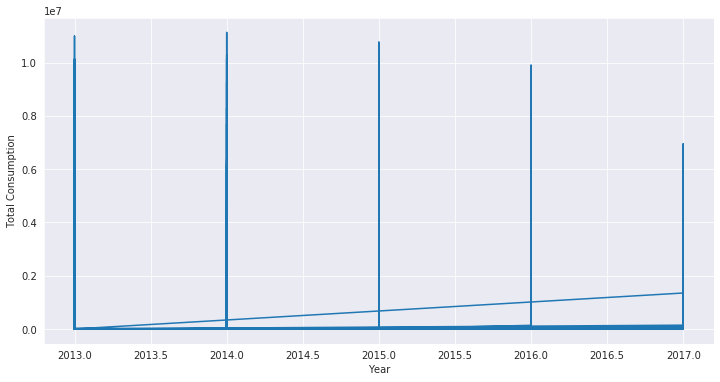

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
                

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(Corporate_Energy['Year'], Corporate_Energy['Total Consumption'])
plt.ylabel('Total Consumption')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
#adf.scaled[1.0] = '%y'
plt.xlabel('Year')

Text(0, 0.5, 'Count')

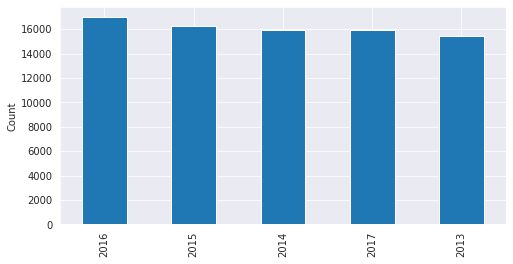

In [0]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
Corporate_Energy['Year'].value_counts().plot(kind='bar')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

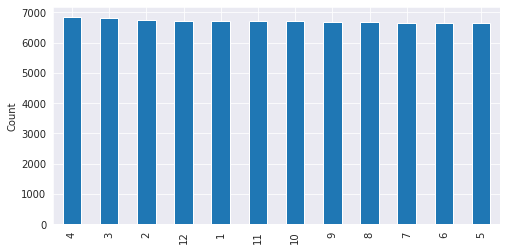

In [0]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
Corporate_Energy['Month'].value_counts().plot(kind='bar')
plt.ylabel('Count')

Text(0.5, 0, 'Month')

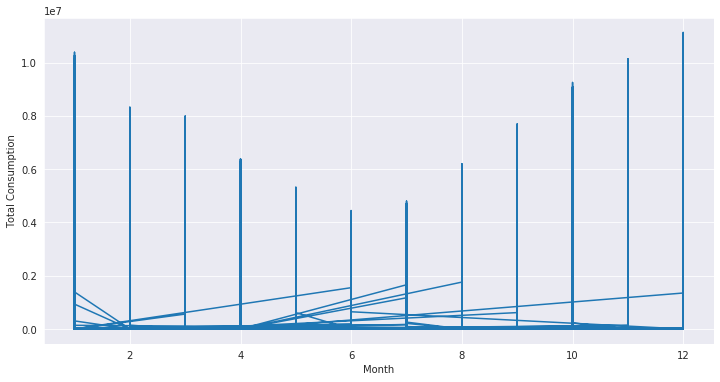

In [0]:

sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.plot(Corporate_Energy['Month'], Corporate_Energy['Total Consumption'])
plt.ylabel('Total Consumption')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('Month')

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
features = Corporate_Energy[['Year', 'Month', 'Total Consumption']]

features.head()

,Year,Month,Total Consumption
2590,2017,9,0.0
3128,2017,2,0.0
3274,2017,2,0.0
3722,2015,11,6288.0
4481,2015,5,9.0


In [0]:
df_model = Corporate_Energy[['Year', 'Month']]

df_model.head()

,Year,Month
2590,2017,9
3128,2017,2
3274,2017,2
3722,2015,11
4481,2015,5


In [0]:
df_features = features.apply (pd.to_numeric, errors='coerce')
df_features = df.dropna()

df_features

,Year,Month,Total Consumption
2590,2017,9,0.0
3128,2017,2,0.0
3274,2017,2,0.0
3722,2015,11,6288.0
4481,2015,5,9.0
...,...,...,...
119232,2013,4,7297.0
119234,2013,4,3584.0
119235,2013,4,2551.0
119237,2013,4,56.0


In [0]:
df_model1 = df_model.apply (pd.to_numeric, errors='coerce')
df_model2 = df_model1.dropna()

df_model2

,Year,Month
2590,2017,9
3128,2017,2
3274,2017,2
3722,2015,11
4481,2015,5
...,...,...
119232,2013,4
119234,2013,4
119235,2013,4
119237,2013,4


In [0]:
df_model2.shape, df_features.shape

((80547, 2), (80521, 3))

In [0]:
# transform data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [0]:
X_train.shape, y_train.shape


((48312, 3), (48312, 3))

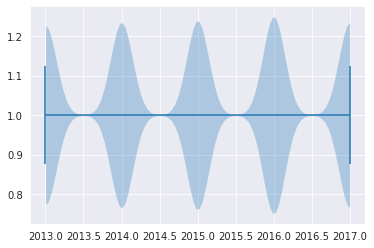

In [0]:

fig, ax = plt.subplots()

# Create violinplot
ax.violinplot(Corporate_Energy["Year"], vert=False)

# Show the plot
plt.show()

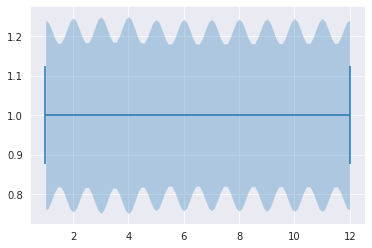

In [0]:
fig, ax = plt.subplots()

# Create violinplot
ax.violinplot(Corporate_Energy["Month"], vert=False)

# Show the plot
plt.show()

In [0]:
features=df.dropna(how='all')

In [0]:


import pandas as pd

from sklearn.model_selection import train_test_split

y= features['Total Consumption']


y= features['Total Consumption']
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.8)



In [251]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(16104, 3) (16104,)
(64417, 3) (64417,)


In [253]:
# fit a model
from sklearn import datasets, linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

predictions[0:5]

array([4.30000e+01, 1.76160e+04, 9.73600e+04, 4.35030e+04, 1.46091e+05])

Text(0, 0.5, 'Predictions')

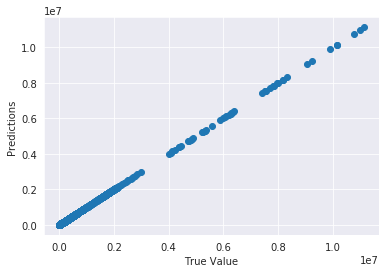

In [255]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Value")
plt.ylabel("Predictions")

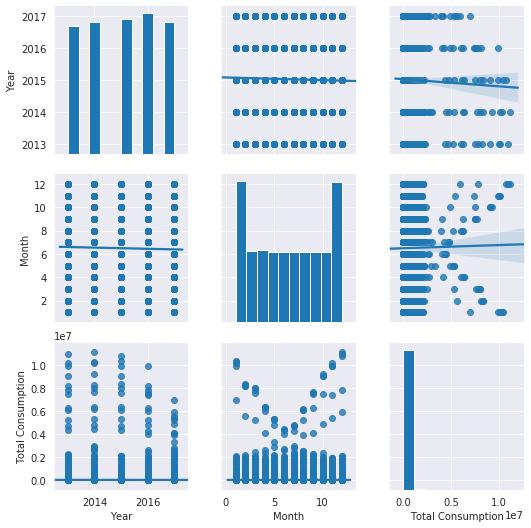

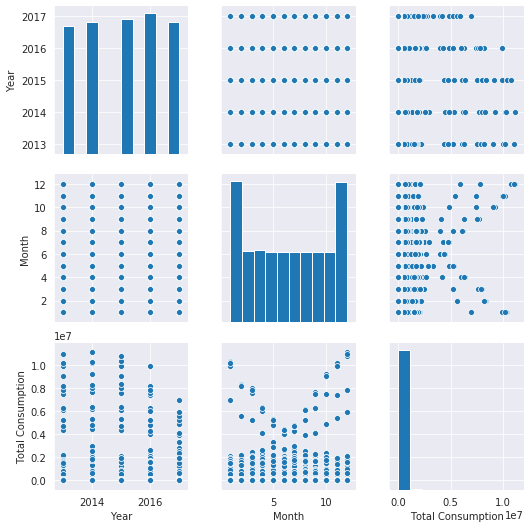

In [258]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
df = features
 
# with regression
sns.pairplot(df, kind="reg")
plt.show()
 
# without regression
sns.pairplot(df, kind="scatter")
plt.show()

In [0]:
print(df4.corr())

                       Year  Total Consumption
Year               1.000000          -0.003621
Total Consumption -0.003621           1.000000


In [0]:
df11 = pd.read_csv('Corporate_Energy_month.csv')

print(df11.info(null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80547 entries, 0 to 80546
Data columns (total 10 columns):
Unnamed: 0            80547 non-null int64
Business Unit Desc    80547 non-null object
FacilityName          80547 non-null object
Site ID               80547 non-null object
FacilityAddress       80547 non-null object
Energy Description    80547 non-null object
Year                  80547 non-null int64
Month                 80547 non-null object
Total Consumption     80521 non-null float64
Unit                  80547 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 6.1+ MB
None


In [0]:
df12 = pd.DataFrame(df11)
df12.head(12)

,Unnamed: 0,Business Unit Desc,FacilityName,Site ID,FacilityAddress,Energy Description,Year,Month,Total Consumption,Unit
0,1916,Calgary Parks,CRA062,0020006474122,41 CRANARCH GV SE,Electricity,2017,Sep,0.0,kWh
1,2283,Calgary Parks,TUS604,0020005539722,944 TUSCANY DR NW,Electricity,2017,Feb,0.0,kWh
2,2416,Calgary Parks,TUS607,0020005384571,170 TUSCANY WY NW,Electricity,2017,Feb,0.0,kWh
3,2778,Roads,TRAFFIC BUILDING,0020003612065,938 32 AV NE,Electricity,2015,Nov,6288.0,kWh
4,3278,Calgary Parks,RAM021,0020006186276,1120 10 ST SE,Electricity,2015,May,9.0,kWh
5,3305,Calgary Parks,MCT778,0020005838494,5 PRESTWICK MR SE,Electricity,2015,Dec,0.0,kWh
6,3979,Calgary Parks,PAN008,0020006741745,55 PANORA RI NW,Electricity,2015,Dec,368.0,kWh
7,4156,Calgary Parks,MCT900,0020005762913,4975R 130 AV SE,Electricity,2015,Aug,9.0,kWh
8,4285,Calgary Parks,WSP497,0020005537703,800 73 ST SW,Electricity,2015,Aug,4.0,kWh
9,4324,Calgary Parks,WSP498,0020005822645,66 WESTON MR SW,Electricity,2015,Aug,9.0,kWh


In [0]:
df12.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80547 entries, 0 to 80546
Data columns (total 10 columns):
Unnamed: 0            80547 non-null int64
Business Unit Desc    80547 non-null object
FacilityName          80547 non-null object
Site ID               80547 non-null object
FacilityAddress       80547 non-null object
Energy Description    80547 non-null object
Year                  80547 non-null int64
Month                 80547 non-null object
Total Consumption     80521 non-null float64
Unit                  80547 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 6.1+ MB


In [0]:
from sklearn.preprocessing import Imputer
cols = ['Total Consumption','Year', 'Month']
df13 = df12[cols].fillna(0)

df13

,Total Consumption,Year,Month
0,0.0,2017,Sep
1,0.0,2017,Feb
2,0.0,2017,Feb
3,6288.0,2015,Nov
4,9.0,2015,May
...,...,...,...
80542,7297.0,2013,Apr
80543,3584.0,2013,Apr
80544,2551.0,2013,Apr
80545,56.0,2013,Apr


In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr = LinearRegression()  #lr = LinearRegression(normalize = True)

In [0]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
type(lr)

sklearn.linear_model.base.LinearRegression

In [0]:
lr.fit(X = df13[['Year']], y = df13["Total Consumption"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print(lr.score(X = df13[['Year']], y = df13["Total Consumption"]))

1.2889169570207137e-05


In [0]:
print(lr.intercept_, lr.coef_)

1201606.2032715345 [-581.9496797]


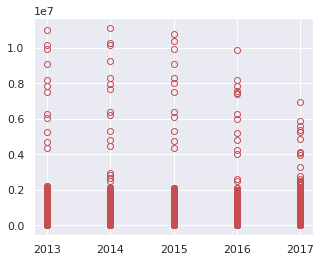

In [0]:
plt.plot(df13['Year'], df13['Total Consumption'], 'or', mfc='none')

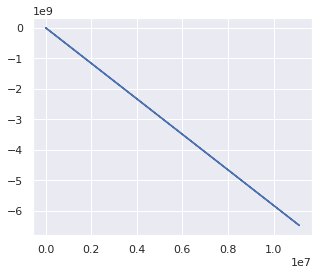

In [0]:
plt.plot(df13['Total Consumption'], lr.intercept_ + lr.coef_ * df13['Total Consumption'], '-b')
                                                                     
                                                                     

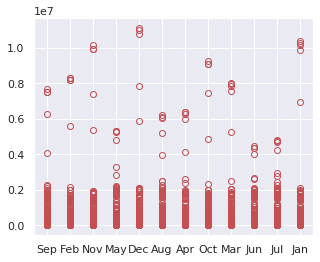

In [0]:
plt.plot(df13['Month'], df13['Total Consumption'], 'or', mfc='none')

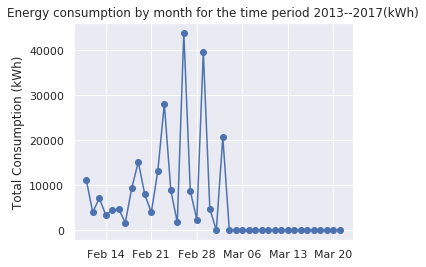

In [0]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot(df13.loc['2013':'2017', 'Total Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Total Consumption (kWh)')
ax.set_title('Energy consumption by month for the time period 2013--2017(kWh)')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));


#df13['Month'].plot(linewidth=0.5);
   ## ax.set_ylabel('Energy consumption by month for the time period 2013--2017(kWh)')

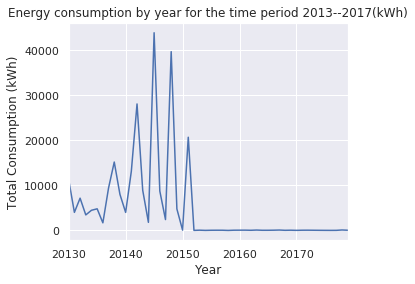

In [0]:
ax = df13.loc['2013':'2018', 'Total Consumption'].plot()
ax.set_title('Energy consumption by year for the time period 2013--2017(kWh)')
ax.set_ylabel('Total Consumption (kWh)');
ax.set_xlabel('Year');